<center><H1><b> Творческое задание Лутфуллиной Альбины</b></H1>



## Выбор набора данных
### Информация о данных 
Код - индивидуальный ключ каждого товара

Группа товаров - категория на сайте в которой хранится соответствующий товар

Товар - наименование товара, включающее в себя тип и бренд

Старая цена - цена до изменений

Новая цена  - цена указанная на сайте

Город - место продажи указанного товара

### Цель -  исследовать какие факторы влияют на новую цену товара 


#  Загрузка и подготовительная обработка данных

Для начала импортируем необходимые библотеки для обработки данных

In [1]:
#загрузка необходимых библиотек
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn import preprocessing
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import chardet
matplotlib.style.use('ggplot')
%matplotlib inline 
pd.set_option('display.float_format', lambda x: '%.1f' % x)

Так как колонка группа товаров содержит в себе значимую информацию, то можно извлечь из нее категорию, к которой относится продоваемый объект

In [2]:
with open(r'list_aku.csv', 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large
data = pd.read_csv(r'list_aku.csv',encoding=result['encoding'],header = None, error_bad_lines=False,sep =';',names =('Группа товаров','Код', 'Товар' ,'Новая цена','Старая цена','Город'))
# Разделим столбец "группа товаров" на несколько столбцов
dat=data['Группа товаров'].str.split('/',expand=True)
dat.columns=['Категория', 'Подкатегория'] 
# Объединим получнные данные в одну таблицу
d=pd.concat([data,dat['Категория']],axis=1)
d

,Группа товаров,Код,Товар,Новая цена,Старая цена,Город,Категория
0,Детская одежда/Спортивные костюмы - для мальчиков,291601,Maru-maru Штанишки 115171001,648,1115,Санкт-Петербург,Детская одежда
1,Детские игрушки и игры/Lego,291640,Конструктор Lego Налобный фонарик Star Wars Po...,708,999,Санкт-Петербург,Детские игрушки и игры
2,"Детская одежда/Боди, песочники, комбинезоны - ...",291652,Папитто Песочник для мальчика Fashion Jeans 5...,540,780,Санкт-Петербург,Детская одежда
3,"Детская одежда/Боди, песочники, комбинезоны - ...",291655,Папитто Песочник для мальчика Fashion Jeans 5...,669,740,Санкт-Петербург,Детская одежда
4,"Детская одежда/Боди, песочники, комбинезоны - ...",291655,Папитто Песочник для мальчика Fashion Jeans 5...,499,730,Москва,Детская одежда
...,...,...,...,...,...,...,...
35944,Развитие и школа/Школьные рюкзаки,779837,Набор MadPax Рюкзак Blok Half Heavy metal Out...,8202,8695,Москва,Развитие и школа
35945,Развитие и школа/Школьные рюкзаки,779847,Набор MadPax Рюкзак Blok Half Heavy metal Out...,8258,8570,Москва,Развитие и школа
35946,Развитие и школа/Школьные рюкзаки,779852,Набор MadPax Рюкзак Blok Half Heavy metal Out...,8340,8874,Москва,Развитие и школа
35947,Развитие и школа/Школьные рюкзаки,779861,Набор MadPax Рюкзак Bubble Half Monsters Unde...,9902,10530,Москва,Развитие и школа


##  Описание, анализ и визуализация данных:

Таким образом, в рассмотрении имеются следующие поля:
- категория
- код
- товар
- цена
- старая цена
- город


Преобразуем поля город и категория из категориальных в числовые, чтобы их можно было также учитывать. 

От полей код и товар стоит отказаться ввиду их незначимости.
А поле группа товаров содержит в себе поле категория, следовательно удалим его.

In [3]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35949 entries, 0 to 35948
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Группа товаров  35949 non-null  object
 1   Код             35949 non-null  int64 
 2   Товар           35949 non-null  object
 3   Новая цена      35949 non-null  int64 
 4   Старая цена     35949 non-null  int64 
 5   Город           35949 non-null  object
 6   Категория       35949 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.9+ MB


In [4]:
d.isna().sum()#пропусков не имеется ни в одном из столбцов

Группа товаров    0
Код               0
Товар             0
Новая цена        0
Старая цена       0
Город             0
Категория         0
dtype: int64

пропусков не имеется ни в одном из столбцов

## Группировка данных в итоговую таблицу

In [5]:
d = d.drop(['Код','Товар','Группа товаров'],axis = 1) #избавляемся от полей код, товар и группа товаров

In [6]:
d.head()

,Новая цена,Старая цена,Город,Категория
0,648,1115,Санкт-Петербург,Детская одежда
1,708,999,Санкт-Петербург,Детские игрушки и игры
2,540,780,Санкт-Петербург,Детская одежда
3,669,740,Санкт-Петербург,Детская одежда
4,499,730,Москва,Детская одежда


In [7]:
d['Категория'].value_counts()
d['Категория'].nunique()

20

In [8]:
d['Категория'].value_counts()

Детская одежда               9662
Развитие и школа             5408
Детские игрушки и игры       5345
Постельные принадлежности    3019
Творчество и хобби           2605
Детская мебель               1521
Книжки                       1399
Гигиена и здоровье           1180
Детская обувь                 906
Детские коляски               713
Аксессуары для кормления      598
Детский транспорт             596
Спорт и отдых                 559
Товары для мамы               495
Летние товары                 464
Купание малыша                408
Зимние товары                 382
Детские автокресла            305
Детское питание               264
Безопасность ребенка          120
Name: Категория, dtype: int64

## 	исследование шкалы измерения каждого существенного признака;

In [9]:
#описательная статистика
d.describe()

,Новая цена,Старая цена
count,35949.0,35949.0
mean,1932.5,2375.8
std,4836.4,5860.6
min,8.0,10.0
25%,264.0,340.0
50%,625.0,800.0
75%,1665.0,2099.0
max,136799.0,179999.0


In [10]:
print(f'В выборке рассмотрены офферы на продажу {data.shape[0]} изделий')

В выборке рассмотрены офферы на продажу 35949 изделий


### Типы данных

В конечном итоге, имеем датафрейм с двумя  типами данных:

**город, категория**  - категориальные данные

**Новая цена** - нумерические данные, принимает значения от 8 до 136799.0 рублей

**Старая цена** - нумерические данные, принимает значения от 10 до 179999.0 рублей


## Построение эмпирического распределения каждого существенного признака;

Медианная стоимость товаров составила 625


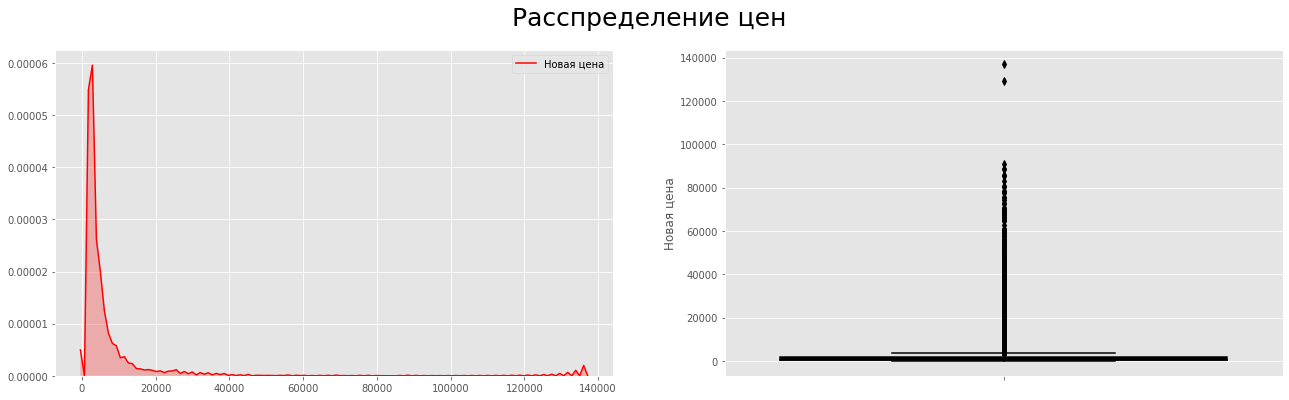

In [11]:
print('Медианная стоимость товаров составила {}'.format(int(data['Новая цена'].median())))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22,6))

plt.subplot(1,2,1)
ax = sns.kdeplot(data['Новая цена'], shade=True, color = 'red')

plt.subplot(1,2,2)
ax = sns.boxplot(y=data['Новая цена'], color = 'black')

fig.suptitle("Расспределение цен",fontsize=25)
plt.show()

Распределение цен слишком сильно смещено влево, поэтому есть смысл далее исследовать их логарифмы

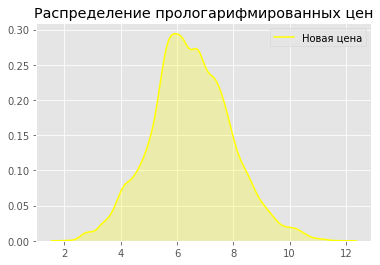

In [12]:
sns.kdeplot(np.log(data['Новая цена']), shade=True, color = 'yellow')
plt.title('Распределение прологарифмированных цен')
plt.show()

Посмотрим на распределения категориальных признаков и их связь с ценами машин

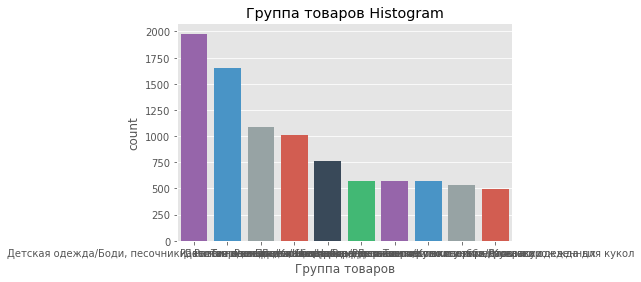

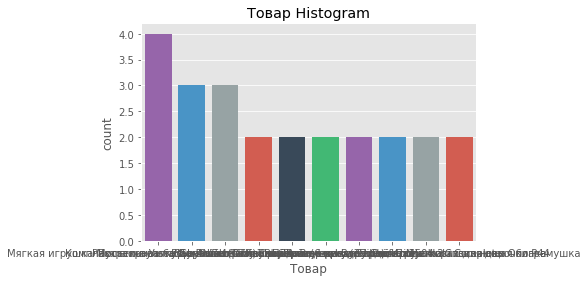

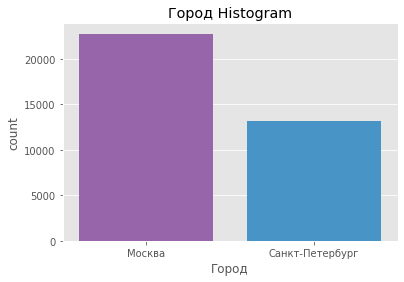

In [13]:
categorical_columns = data.columns[data.dtypes == 'object']
counter = 0
for column in categorical_columns:
    
    columne_most_freq = data[column].value_counts()[:10].sort_values(ascending=False).index
    
    if '' in columne_most_freq:
        columne_most_freq = columne_most_freq.drop('')
       
    counter+=1
    plt.figure(counter)
    plt.title(f'{column} Histogram')
    sns.countplot(
            data[data[column].isin(columne_most_freq)][column],
            order=columne_most_freq,
            palette= ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
    )

    plt.show() #по граифку определяем, что наиболее популярная группа товаров - детская одежда, и в СПБ находится меньше товаров, чем в МСК

по граифку определяем, что наиболее популярная группа товаров - детская одежда, и в СПБ находится меньше товаров, чем в МСК

In [14]:
# d[['Категория','Город']] = d[['Категория','Город']].astype('category')#проиндексируем данные для визуализации корреляции
# d['Категория'] = d['Категория'].cat.codes
# d['Город'] = d['Город'].cat.codes

In [14]:
d[['Категория','Город']] = d[['Категория','Город']].astype('category')#проиндексируем данные для визуализации корреляции
indexes_town = dict(enumerate(d['Город'].cat.categories))
print(indexes_town)
indexes_category = dict(enumerate(d['Категория'].cat.categories))
print(indexes_category)
d['Категория'] = d['Категория'].cat.codes
d['Город']= d['Город'].cat.codes

{0: 'Москва', 1: 'Санкт-Петербург'}
{0: 'Аксессуары для кормления', 1: 'Безопасность ребенка', 2: 'Гигиена и здоровье', 3: 'Детская мебель', 4: 'Детская обувь', 5: 'Детская одежда', 6: 'Детские автокресла', 7: 'Детские игрушки и игры', 8: 'Детские коляски', 9: 'Детский транспорт', 10: 'Детское питание', 11: 'Зимние товары', 12: 'Книжки', 13: 'Купание малыша', 14: 'Летние товары', 15: 'Постельные принадлежности', 16: 'Развитие и школа', 17: 'Спорт и отдых', 18: 'Творчество и хобби', 19: 'Товары для мамы'}


## Построение совместного распределения каждого признака и целевой переменной;

Корреляционная матрица позволила увидеть лишь корреляцию между старой и новой ценой

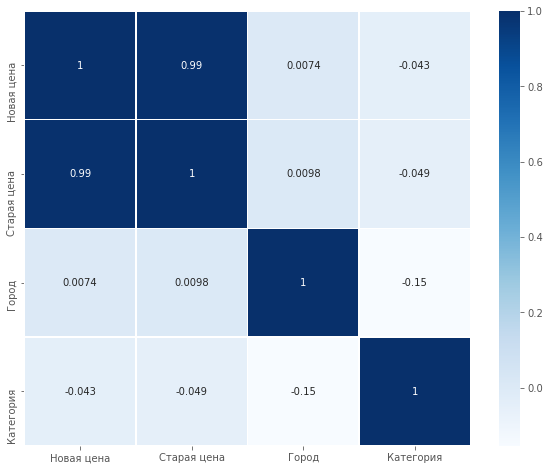

In [15]:
plt.figure(figsize = (10, 8))
sns.heatmap(d.corr(), annot = True, linewidths=.5, cmap = 'Blues')
plt.show()

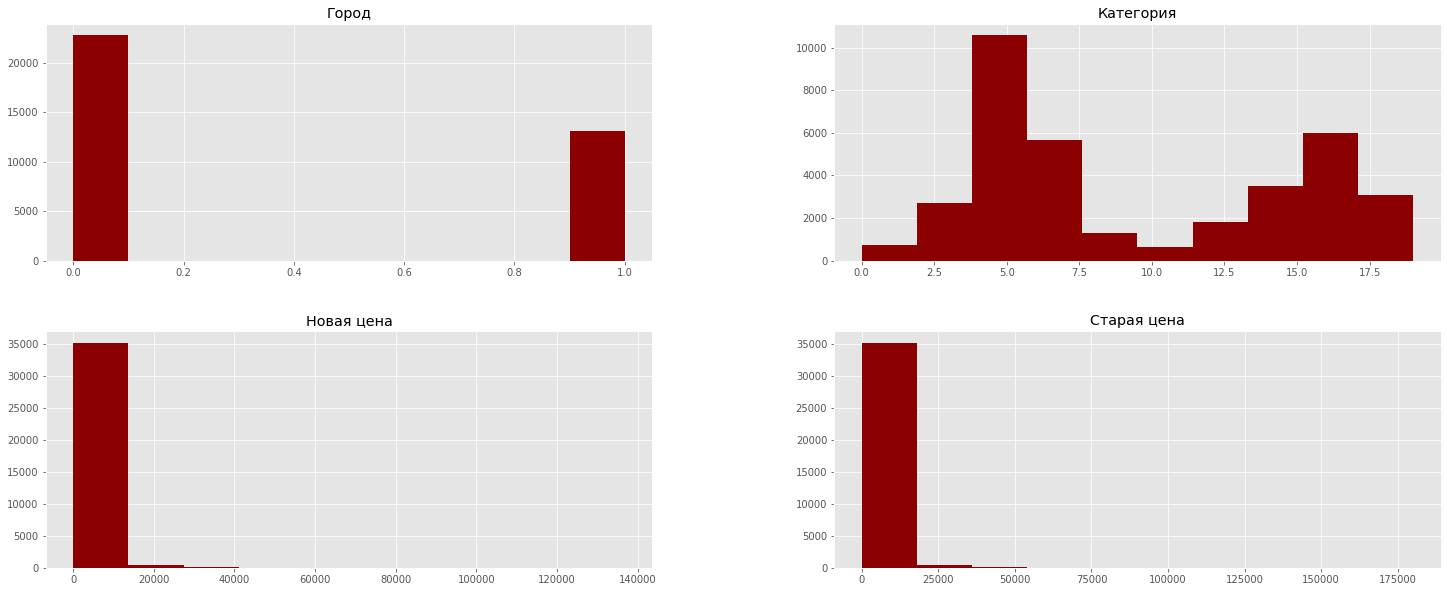

In [16]:
d.hist(figsize=(25,10), color='darkred')
plt.show()

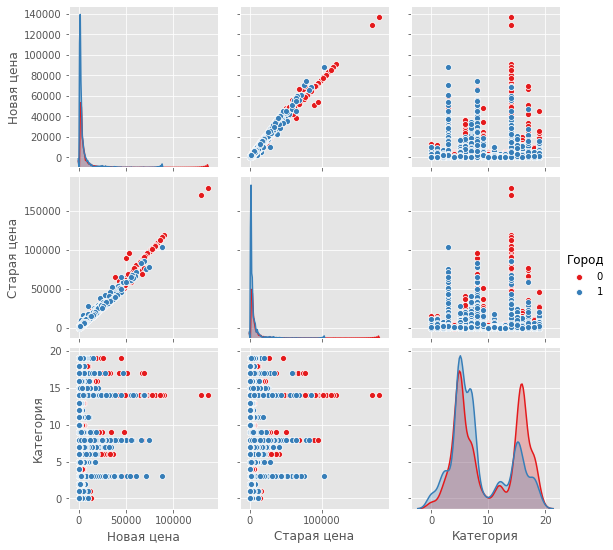

In [17]:
sns.pairplot(d, hue='Город', palette='Set1')

На графиках видна сильная линейная зависимость между старой и новой ценой

## Приведение всех признаков к бинарной либо числовой шкале;

In [18]:
town=pd.get_dummies(d['Город'])
town.columns= indexes_town.values() 
town

,Москва,Санкт-Петербург
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
35944,1,0
35945,1,0
35946,1,0
35947,1,0


In [19]:
category=pd.get_dummies(d['Категория'])
category.columns= indexes_category.values() 
category

,Аксессуары для кормления,Безопасность ребенка,Гигиена и здоровье,Детская мебель,Детская обувь,Детская одежда,Детские автокресла,Детские игрушки и игры,Детские коляски,Детский транспорт,Детское питание,Зимние товары,Книжки,Купание малыша,Летние товары,Постельные принадлежности,Развитие и школа,Спорт и отдых,Творчество и хобби,Товары для мамы
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35944,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
35945,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
35946,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
35947,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [20]:
df=pd.concat([d['Новая цена'],d['Старая цена'], town, category], axis=1)
df

,Новая цена,Старая цена,Москва,Санкт-Петербург,Аксессуары для кормления,Безопасность ребенка,Гигиена и здоровье,Детская мебель,Детская обувь,Детская одежда,...,Детское питание,Зимние товары,Книжки,Купание малыша,Летние товары,Постельные принадлежности,Развитие и школа,Спорт и отдых,Творчество и хобби,Товары для мамы
0,648,1115,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,708,999,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,540,780,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,669,740,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,499,730,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35944,8202,8695,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
35945,8258,8570,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
35946,8340,8874,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
35947,9902,10530,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [21]:
df= df[df["Новая цена"] < 100000] #Исключили выбросы которые видны на графиках

## 3. Кластерный анализ

Перейдем к класстерном анализу.  Категориальные данные уже преобразованы, незначащие столбцы отброшены.

In [22]:
small_df = df[0:15000]
norm = preprocessing.MaxAbsScaler()
norm.fit(small_df)
X_num = norm.transform(small_df)
X_num = pd.DataFrame(X_num, index=small_df.index, columns=small_df.columns)
X_num

,Новая цена,Старая цена,Москва,Санкт-Петербург,Аксессуары для кормления,Безопасность ребенка,Гигиена и здоровье,Детская мебель,Детская обувь,Детская одежда,...,Детское питание,Зимние товары,Книжки,Купание малыша,Летние товары,Постельные принадлежности,Развитие и школа,Спорт и отдых,Творчество и хобби,Товары для мамы
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14996,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
14997,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
14998,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [23]:
link = linkage(X_num, 'ward', 'euclidean')

In [24]:
link[-20:, 2]

array([ 18.19320477,  18.86471281,  18.89058805,  19.39009606,
        20.611207  ,  24.16455336,  25.2272396 ,  26.49344875,
        27.89767751,  28.58427008,  29.03338854,  30.29528707,
        30.49893194,  32.21595195,  39.45587975,  42.48179171,
        53.28098679,  54.35216876,  63.97379682, 120.56023161])

### Построение дендрограммы

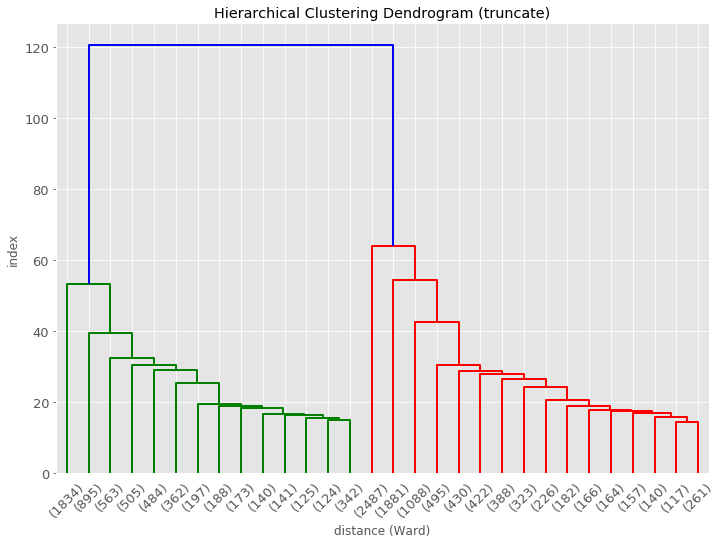

In [25]:
matplotlib.rcParams['lines.linewidth'] = 2

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

dn = dendrogram(
    link,
    labels=X_num.index.tolist(),
    truncate_mode='lastp',
)
ax.tick_params(labelsize=13)
plt.title('Hierarchical Clustering Dendrogram (truncate)')
plt.ylabel('index')
plt.xlabel('distance (Ward)')
plt.show()

### Построение каменистой осыпи

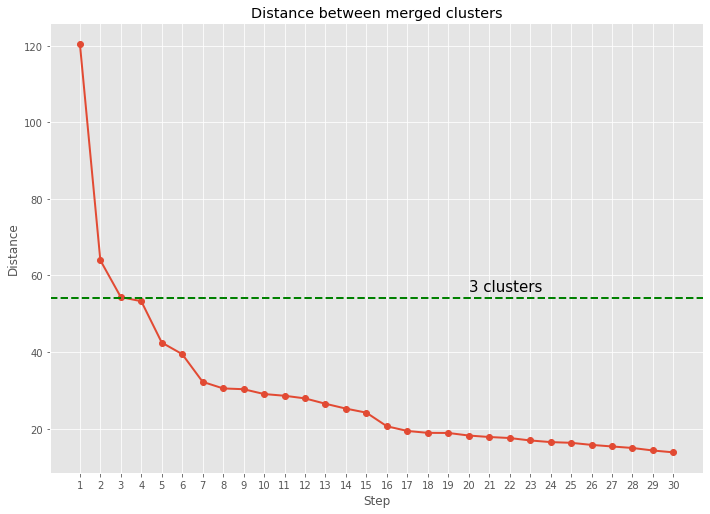

In [26]:
dist = link[-30:, 2]
dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Distance between merged clusters')
plt.xlabel('Step')
plt.ylabel('Distance')
plt.axhline(54, c='g', linestyle='dashed')
plt.text(20, 56, '3 clusters', size = 15)
plt.xticks(np.arange(min(idxs), max(idxs)+1, 1.0))
plt.show()

## Кластеризация методом k-means

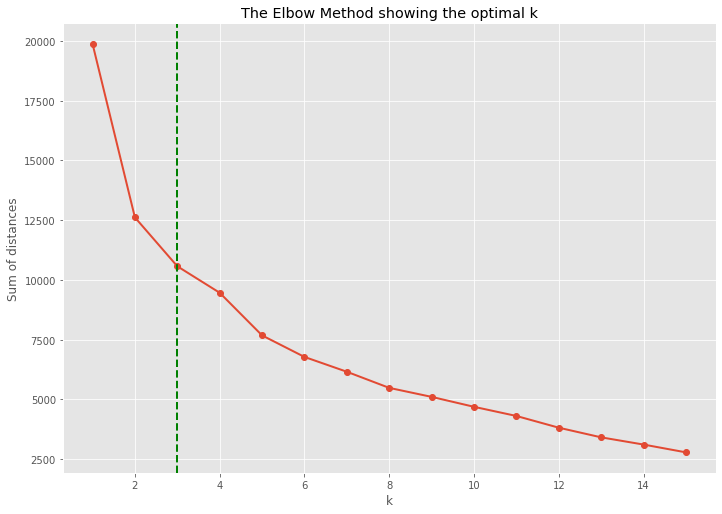

In [27]:
K = range(1, 16)
models = [KMeans(n_clusters=k, random_state=42).fit(X_num.iloc[:, :-1]) for k in K]
dist = [model.inertia_ for model in models]

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.plot(K, dist, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of distances')
plt.axvline(3, c='g', linestyle='dashed')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Исходя из построенных диаграмм, понятно, что логично разбить имеющиеся данные о товарах на 3 кластера

In [28]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(X_num)
X_num['cluster'] = model.labels_
X_num.groupby('cluster').mean()# кластеры являются комбинацией перестановок группы товаров и города

,Новая цена,Старая цена,Москва,Санкт-Петербург,Аксессуары для кормления,Безопасность ребенка,Гигиена и здоровье,Детская мебель,Детская обувь,Детская одежда,...,Детское питание,Зимние товары,Книжки,Купание малыша,Летние товары,Постельные принадлежности,Развитие и школа,Спорт и отдых,Творчество и хобби,Товары для мамы
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,1.0,0.0,0.0,0.1,0.1,0.0,0.0,...,0.0,0.0,0.1,0.0,0.0,0.2,0.1,0.0,0.1,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.1,0.0,0.3,...,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.0,0.1,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
X_num.groupby('cluster').size()

cluster
0    6439
1    6074
2    2487
dtype: int64

TypeError: no numeric data to plot

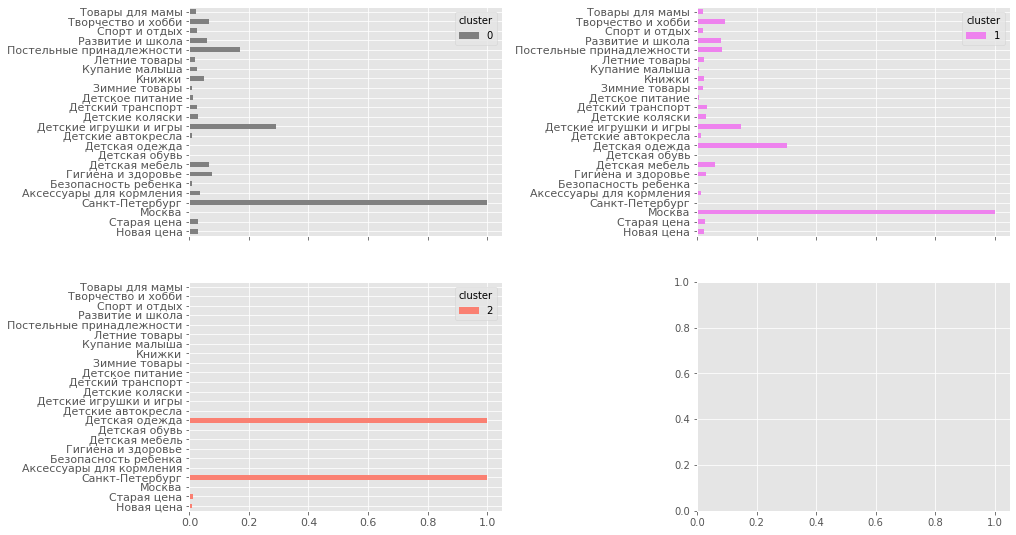

In [30]:
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True)
fig.set_size_inches(14.7, 9.27)
plt.subplots_adjust( wspace=0.625)
k = 0
c = ['grey', 'violet', 'salmon', 'skyblue', 'orange']
for i in range(2):
    for j in range(2):
        ax = axs[i, j]
        k += 1
        X_num[X_num.cluster == k-1].groupby('cluster').mean().T.plot.barh(ax = ax, color = c[k-1])
        ax.tick_params(labelsize = 11)

### Выводы по кластерному анализу 


Кластеры 0, 1, 2 - это машины, которые продают юридические лица. Для них всех важно, чтобы машина была новой. Различаются они только:

- Кластер label = 0 - Товары разных категорий из СПБ

- Кластер label = 1 - Товары разных категорий из МСК

- Кластер label = 2 - Товары категории Детские игрушки и игры из СПБ

## Построение регресси новой цены товара по представленным признакам

### Линейная регрессия

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [33]:
import statsmodels.api as sm
#линейная регрессия
y = df['Новая цена']
X = df.drop(['Новая цена'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=20)
est = sm.OLS(y_train, X_train)
est = est.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:             Новая цена   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 9.882e+04
Date:                Tue, 09 Jun 2020   Prob (F-statistic):               0.00
Time:                        21:22:20   Log-Likelihood:            -2.2242e+05
No. Observations:               28757   AIC:                         4.449e+05
Df Residuals:                   28735   BIC:                         4.451e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Старая цена           

In [34]:
def find_prediction_at_instance_for_ols(X_train, params, instance):
    return sum([val*X_train[instance, i].sum() for i, val in enumerate(params[:-1])])

In [35]:
print (f'R^2: {est.rsquared_adj}')

R^2: 0.9863330122295056


In [36]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [37]:
results_ols = pd.DataFrame()
results_ols['coefs'] = est.params
results_ols['p_value'] = est.pvalues
results_ols

,coefs,p_value
Старая цена,0.8124,0.0000
Москва,69.8859,0.0000
Санкт-Петербург,49.0653,0.0000
Аксессуары для кормления,-53.3937,0.0301
Безопасность ребенка,-23.4670,0.6664
Гигиена и здоровье,-37.2356,0.0374
Детская мебель,254.8149,0.0000
Детская обувь,-293.8843,0.0000
Детская одежда,-190.2686,0.0000
Детские автокресла,324.0875,0.0000


Полученные коэффиценты означают следующее:
-старая цена очень сильно коррелирует с новой

In [38]:
print(X_train.shape)
print(y_train.shape)

(28757, 23)
(28757,)


Я честно долго пыталась исправить ошибку, но даже гугл не смог мне объяснить как правильно соединять таблички чтобы количество строк странным образом не увеличивалось :((((

In [43]:
constanta=pd.DataFrame({'index': list(range(len(X_train)))})
constanta['const'] = 1
iks=pd.concat([constanta['const'], X_train ], axis=1, ignore_index=True)
iks.columns=list(range(24))

print(iks)
print(X_train.shape) 
print(constanta['const'].shape)
print(iks.shape)

igrek=pd.DataFrame()
igrek.loc[0, 0] = 1
igrek=pd.concat([igrek, y_train], axis=0)
print(igrek)

beta=(pd.DataFrame(np.linalg.inv(iks.transpose().dot(iks))).dot(iks.transpose())).dot(igrek)
beta.columns=['coefs']
print(beta)

          0      1          2      3      4      5      6      7      8   \
0     0.0000 1.0000  1115.0000 0.0000 1.0000 0.0000 0.0000 0.0000 0.0000   
1     1.0000 1.0000        nan    nan    nan    nan    nan    nan    nan   
2     2.0000 1.0000        nan    nan    nan    nan    nan    nan    nan   
3     3.0000 1.0000        nan    nan    nan    nan    nan    nan    nan   
4     4.0000 1.0000   730.0000 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
...      ...    ...        ...    ...    ...    ...    ...    ...    ...   
35944    nan    nan  8695.0000 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
35945    nan    nan  8570.0000 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
35946    nan    nan  8874.0000 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
35947    nan    nan 10530.0000 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
35948    nan    nan 10674.0000 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000   

          9   ...     15     16     17     18     19     20     21     22  \
0     0.00

ValueError: matrices are not aligned

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn import model_selection, datasets, linear_model, metrics

In [49]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [91]:
print("R^2: ", linear_regressor.score(X_train, y_train))
print("Абсолютная ошибка train:",metrics.mean_absolute_error(y_train, linear_regressor.predict(X_train)))
print("Абсолютная ошибка test:",metrics.mean_absolute_error(y_test, linear_regressor.predict(X_test)))

R^2:  0.9863429929898054
Абсолютная ошибка train: 207.16703308265213
Абсолютная ошибка test: 201.92289662846994


In [101]:
y_predLinear = linear_regressor.predict(X_test)

testPredLinear=pd.DataFrame()
testPredLinear['fact']=y_test.copy()
testPredLinear['pred']=ypredLinear

testPredLinear.head()

,fact,pred
2663,210,151.2588
12032,40,52.4494
35109,63,118.3686
23381,225,234.0010
19014,1167,1007.3946


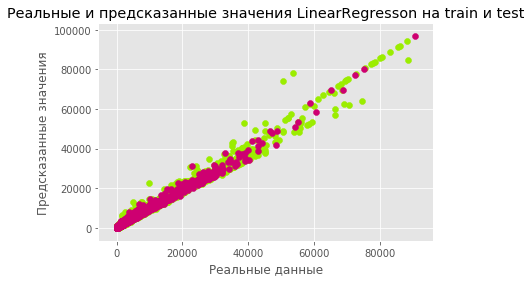

In [89]:
plt.title("Реальные и предсказанные значения LinearRegresson на train и test")
plt.xlabel("Реальные данные")
plt.ylabel("Предсказанные значения")
plt.scatter(y_train,linear_regressor.predict(X_train), color=['#9BED00'])
plt.scatter(y_test,linear_regressor.predict(X_test), color=['#CE0071'])

Линейная модель полученная методом OLS показала отличные результаты. 
Воспользуемся еще методами Lasso и Ridge для сравнения результатов.

### Лассо регрессия

In [54]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LassoCV, RidgeCV

In [55]:
lasso_regressor = Lasso(random_state = 1)
lasso_regressor.fit(X_train, y_train)
lasso_predictions = lasso_regressor.predict(X_train)

In [56]:
rmse = np.sqrt(mean_squared_error(y_train, lasso_predictions.astype(int))).round(2)
print(f'RMSE = {rmse}')

RMSE = 553.59


In [93]:
score = lasso_regressor.score(X_train, y_train)
print('R^2 = {}'.format(score))

R^2 = 0.9863184596339856


In [58]:
results_lasso= pd.DataFrame()
results_lasso['coefs'] = [*lasso_regressor.coef_, lasso_regressor.intercept_]

results_lasso

,coefs
0,0.8133
1,16.7207
2,-0.0000
3,-0.0000
4,0.0000
5,-0.0000
6,260.8345
7,-217.8411
8,-150.7494
9,240.8750


In [59]:
prediction = pd.DataFrame()
prediction['pred'] = lasso_regressor.predict(X_train)
prediction['fact'] = y_train

In [60]:
prediction.sample(17).T

,20610,17246,15953,27009,26243,762,27631,498,17578,2122,21290,16470,25181,1876,15585,1971,7414
pred,433.1468,1556.3683,462.9697,3101.6174,983.8172,461.9038,217.9189,302.2979,862.6127,241.9592,2230.5798,175.4141,59.3288,269.6769,2189.1023,2763.9492,4952.4843
fact,575.0000,950.0000,2795.0000,nan,599.0000,568.0000,767.0000,2840.0000,320.0000,5686.0000,688.0000,nan,150.0000,210.0000,157.0000,nan,nan


In [100]:
y_predLasso = lasso_regressor.predict(X_test)

testPredLasso = pd.DataFrame()
testPredLasso['fact']=y_test.copy()
testPredLasso['pred']=y_predLasso

testPredLasso.head()

,fact,pred
2663,210,156.6306
12032,40,55.2624
35109,63,110.3515
23381,225,234.6397
19014,1167,1015.5469


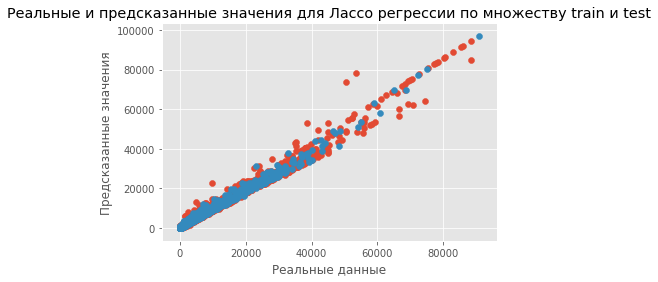

In [62]:
plt.title("Реальные и предсказанные значения для LassoRegression на train и test")
plt.xlabel("Реальные данные")
plt.ylabel("Предсказанные значения")
plt.scatter(y_train,lasso_regressor.predict(X_train))
plt.scatter(y_test,lasso_regressor.predict(X_test))

Это метод явно хуже OLS, это можно понять не только по R^2, но и по RMSE. Перейдем к Риджу.

### Ридж регрессия

In [63]:
ridge_regressor = Ridge(random_state = 1)
ridge_regressor.fit(X_train, y_train)
ridge_predictor = ridge_regressor.predict(X_train)

In [95]:
score = ridge_regressor.score(X_train, y_train)
print('R^2 = {}'.format(score))
print("Абсолютная ошибка train:",metrics.mean_absolute_error(y_train, ridge_regressor.predict(X_train)))
print("Абсолютная ошибка test:",metrics.mean_absolute_error(y_test, ridge_regressor.predict(X_test)))

R^2 = 0.9863429904344949
Абсолютная ошибка train: 207.14489349897758
Абсолютная ошибка test: 201.900282334061


In [65]:
results_ridge= pd.DataFrame()
results_ridge['coefs'] = [*ridge_regressor.coef_, ridge_regressor.intercept_]
results_ridge

,coefs
0,0.8124
1,10.4032
2,-10.4032
3,-59.1434
4,-29.0611
5,-43.0614
6,248.6365
7,-299.3528
8,-196.1155
9,316.8740


In [66]:
prediction = pd.DataFrame()
prediction['pred'] = ridge_regressor.predict(X_train)
prediction['fact'] = y_train

In [67]:
prediction.sample(17).T

,7670,18718,6774,18774,14441,16817,9004,19513,16844,24329,4910,20359,28408,14953,10840,27331,20299
pred,1158.6668,1190.7362,1020.1304,3507.7043,1169.8908,73.6740,414.0733,342.3670,7975.9531,162.5429,447.4928,172.0862,620.4252,219.3725,240.2178,138.1316,2299.1392
fact,nan,920.0000,690.0000,65.0000,nan,155.0000,237.0000,255.0000,319.0000,22990.0000,130.0000,1325.0000,1920.0000,450.0000,3240.0000,344.0000,nan


In [104]:
y_predRidge = ridge_regressor.predict(X_test)

testPredRidge = pd.DataFrame()
testPredRidge['fact']=y_test.copy()
testPredRidge['pred']=y_predRidge

testPredRidge.head()

,fact,pred
2663,210,151.2798
12032,40,52.4872
35109,63,118.3565
23381,225,234.0131
19014,1167,1007.4091


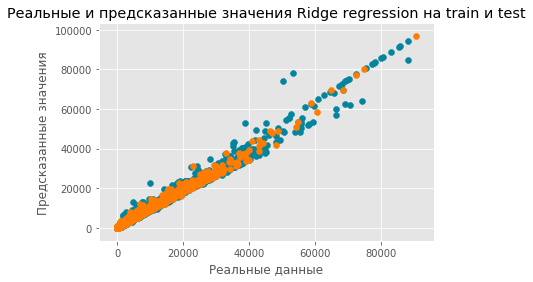

In [86]:
plt.title("Реальные и предсказанные значения Ridge regression на train и test")
plt.xlabel("Реальные данные")
plt.ylabel("Предсказанные значения")
plt.scatter(y_train,ridge_regressor.predict(X_train), color=['#04859D'])
plt.scatter(y_test,ridge_regressor.predict(X_test), color=['#FF7C00'])

Метод Ridge показал наилучшие после OLS результаты. Также используем градиентный бустинг и Рандом форест, возможно они сравнятся по результативности с Ридж регрессией.

### Градиентный бустинг 

In [70]:
from sklearn.ensemble import GradientBoostingRegressor

boosting_regressor = GradientBoostingRegressor()
boosting_regressor.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [84]:
score = boosting_regressor.score(X_train, y_train)
print('R^2 = {}'.format(score))
print("Абсолютная ошибка train:",metrics.mean_absolute_error(y_train, boosting_regressor.predict(X_train)))
print("Абсолютная ошибка test:",metrics.mean_absolute_error(y_test, boosting_regressor.predict(X_test)))

R^2 = 0.9930947604488207
Абсолютная ошибка train: 161.44681196507756
Абсолютная ошибка test: 166.20911308966302


In [72]:
prediction = pd.DataFrame()
prediction['pred'] = boosting_regressor.predict(X_train)
prediction['fact'] = y_train
prediction.sample(17).T

,28670,27900,16712,21353,9015,8249,9696,1000,8637,20347,18987,25448,8759,25493,17947,24410,24235
pred,422.9668,8908.9523,986.6812,3717.2445,787.5501,81.1579,152.6007,422.9668,506.5666,2390.0996,1537.9016,298.8587,2459.7192,930.9540,916.7254,610.2473,1046.3958
fact,549.0000,858.0000,nan,588.0000,203.0000,1010.0000,9367.0000,1620.0000,277.0000,600.0000,320.0000,nan,728.0000,240.0000,nan,3990.0000,2045.0000


In [105]:
y_predboosting = boosting_regressor.predict(X_test)
testPredboosting = pd.DataFrame()
testPredboosting['fact']=y_test.copy()
testPredboosting['pred']=y_predboosting

testPredboosting.head()

,fact,pred
2663,210,247.8921
12032,40,59.6678
35109,63,81.1579
23381,225,213.0618
19014,1167,1030.4043


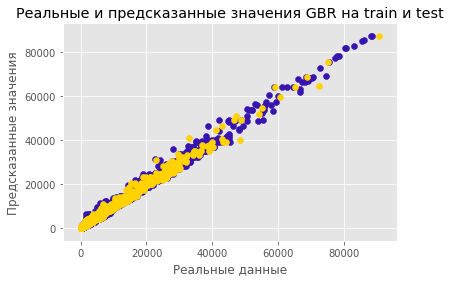

In [87]:
plt.title("Реальные и предсказанные значения GBR на train и test")
plt.xlabel("Реальные данные")
plt.ylabel("Предсказанные значения")
plt.scatter(y_train,boosting_regressor.predict(X_train),color=['#3714B0'] )
plt.scatter(y_test,boosting_regressor.predict(X_test),color=['#FFD200'])

### Рандом Форест

In [75]:
from sklearn.ensemble import RandomForestRegressor
randomforest_regressor = RandomForestRegressor()
randomforest_regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [106]:
score = randomforest_regressor.score(X_train, y_train)
print('R^2 = {}'.format(score))
print("Абсолютная ошибка train:",metrics.mean_absolute_error(y_train, randomforest_regressor.predict(X_train)))
print("Абсолютная ошибка test:",metrics.mean_absolute_error(y_test, randomforest_regressor.predict(X_test)))

R^2 = 0.9980598318815901
Абсолютная ошибка train: 81.58333139847134
Абсолютная ошибка test: 149.08644530830952


In [77]:
prediction = pd.DataFrame()
prediction['pred'] = randomforest_regressor.predict(X_train)
prediction['fact'] = y_train
prediction.sample(17).T

,9911,325,4599,13813,18622,1527,3556,13556,16983,23067,15462,9708,15071,21569,20446,9156,22535
pred,932.3878,593.2966,268.9409,1218.5131,492.1286,17.2039,2422.2000,604.5508,670.1500,1335.7208,1585.7364,281.8392,78.5967,595.6580,2343.3363,368.6310,2028.1620
fact,535.0000,140.0000,2140.0000,1474.0000,8100.0000,18970.0000,nan,2670.0000,790.0000,282.0000,265.0000,1350.0000,100.0000,nan,2239.0000,1071.0000,nan


In [107]:
y_predrandomforest = randomforest_regressor.predict(X_test)

testPredrandomforest = pd.DataFrame()
testPredrandomforest['fact']=y_test.copy()
testPredrandomforest['pred']=y_predrandomforest

testPredrandomforest.head()

,fact,pred
2663,210,247.4930
12032,40,41.8220
35109,63,61.1384
23381,225,221.1789
19014,1167,1153.1767


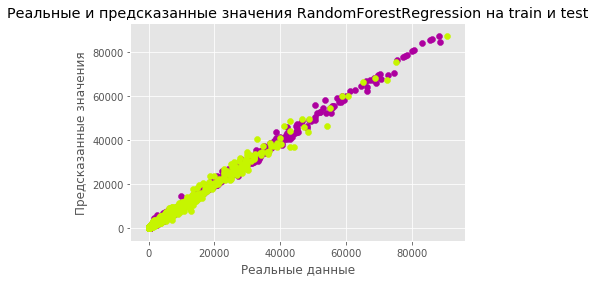

In [88]:
plt.title("Реальные и предсказанные значения RandomForestRegression на train и test")
plt.xlabel("Реальные данные")
plt.ylabel("Предсказанные значения")
plt.scatter(y_train,randomforest_regressor.predict(X_train), color=['#ad009f'])
plt.scatter(y_test,randomforest_regressor.predict(X_test), color=['#C6F500'])

      Регрессия    R^2
4  RandomForest 0.9918
3   Grad.Boost. 0.9916
2         Ridge 0.9897
0        Linear 0.9897
1         Lasso 0.9896


<BarContainer object of 5 artists>

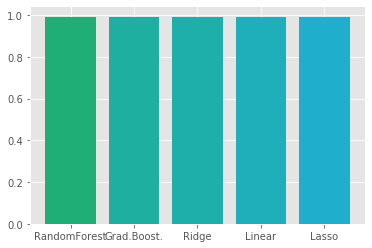

In [80]:
quality=pd.DataFrame()

quality['Регрессия']=['Linear', 'Lasso', 'Ridge', 'Grad.Boost.', 'RandomForest']
quality['R^2']=[linear_regressor.score(X_test, y_test), lasso_regressor.score(X_test, y_test), ridge_regressor.score(X_test, y_test), boosting_regressor.score(X_test, y_test), randomforest_regressor.score(X_test, y_test)]

quality.sort_values('R^2', inplace=True, ascending=False)

print(quality)
plt.bar(quality['Регрессия'],quality['R^2'], color=['#1faf76','#1fafa0','#1fafaa','#1fafbb','#1fafcc'])

      Регрессия  Ошибка на train
3  RandomForest         149.0864
4     GradBoost         166.2091
1         Lasso         199.4810
2         Ridge         201.9003
0        Linear         201.9229


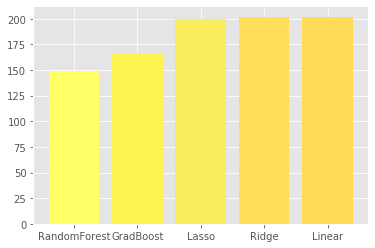

In [81]:
train_err=pd.DataFrame()

train_err['Регрессия']=['Linear', 'Lasso', 'Ridge', 'RandomForest', 'GradBoost']
train_err['Ошибка на train']=[metrics.mean_absolute_error(y_test, linear_regressor.predict(X_test)), metrics.mean_absolute_error(y_test, lasso_regressor.predict(X_test)), metrics.mean_absolute_error(y_test, ridge_regressor.predict(X_test)), metrics.mean_absolute_error(y_test, randomforest_regressor.predict(X_test)),metrics.mean_absolute_error(y_test, boosting_regressor.predict(X_test))]

train_err.sort_values('Ошибка на train', inplace=True)

plt.bar(train_err['Регрессия'],train_err['Ошибка на train'], color=['#ffff66','#fff44f','#fbec5d','#ffde5a','#ffdb58'])
print(train_err)

# Выводы
В рамках проведенной работы были собраны данные о продаваемых машинах. У каждого автомобиля были определены следующие параметры:
-группа товаров
-артикул
-город магазина
-старая цена
-новая цена


Собранные данные были приведены к необходимому для анализа виду. 

Были построены графики, которые помогли понять природу и количество данных и зависимость данных друг от друга.

Данные были кластеризованы методом Kmeans. Количество выделенных кластеров - 3.Логика объяснений кластеров

К имеющимся данным была применена линейная регрессия для предсказания Новой цены по имеющимся параметрам. Были рассмотренны пять моделей: OLS, Lasso, Ridge, GradientBoosting, RandomForest. Лучше всех показала себя модель RandomForest. Полученные коэффициенты в модели говорят нам о том, что главный фактор, влияющий на новую цену - это его старая цена.

In [10]:
a=int(input())
b=int(input())
c=((a**2+ b**2)**0.5)
print(c)

5
12
13.0
